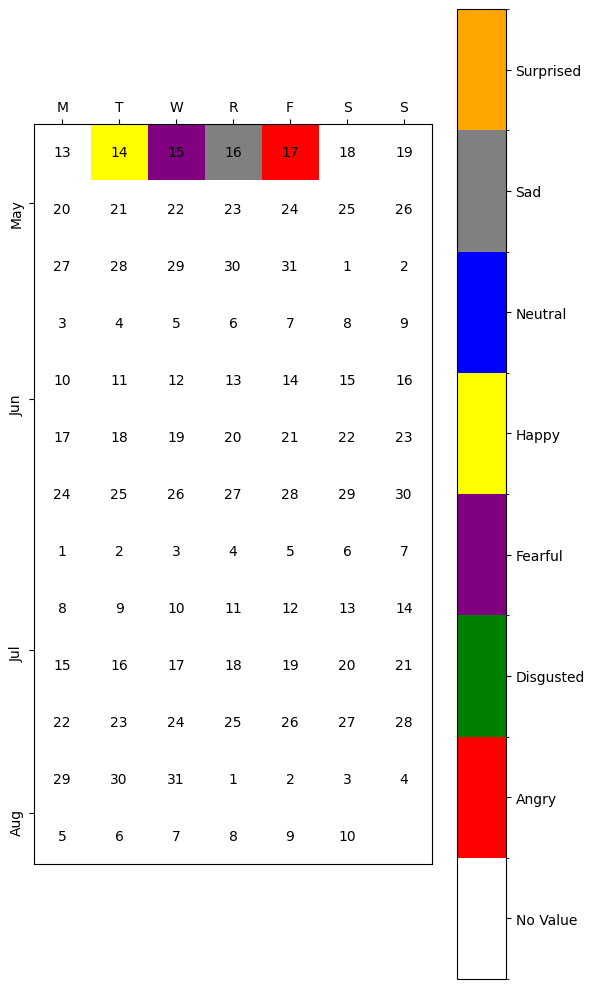

In [11]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def main():
    dates, data = generate_data()
    fig, ax = plt.subplots(figsize=(6, 10))
    calendar_heatmap(ax, dates, data)
    plt.show()

def generate_data():
    num = 90
    # data = np.random.randint(0, 20, num)
    start = dt.datetime(2024, 5, 13)
    dates = [start + dt.timedelta(days=i) for i in range(num)]
    data = [-1]*num
    idx = dates.index(dt.datetime(2024, 5, 14))
    data[idx] = 3
    data[idx+1] = 2
    data[idx+2] = 5
    data[idx+3] = 0
    return dates, data

def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1

    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar


def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    # im = ax.imshow(calendar, interpolation='none', cmap='summer')
    # label_days(ax, dates, i, j, calendar)
    # label_months(ax, dates, i, j, calendar)
    # ax.figure.colorbar(im)

    mood_colors = {
        -1: (1, 1, 1, 0),  # white with alpha 0 for transparency (no color)
        0: 'red',          # angry
        1: 'green',        # disgusted
        2: 'purple',       # fearful
        3: 'yellow',       # happy
        4: 'blue',         # neutral
        5: 'grey',         # sad
        6: 'orange'        # surprised
    }

    # Create a list of colors for the colormap
    cmap = mcolors.ListedColormap([mood_colors[x] for x in range(-1, 7)])

    # Normalize the color map to the data range
    norm = mcolors.BoundaryNorm(np.arange(-1.5, 7.5, 1), cmap.N)

    # Create the heatmap
    im = ax.imshow(calendar, interpolation='none', cmap=cmap, norm=norm)

    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    cbar = ax.figure.colorbar(im, ticks=np.arange(-1, 7))
    cbar.ax.set_yticklabels(['No Value', 'Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised'])

    # Adjust the layout
    ax.figure.tight_layout()

def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]

    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center')

    ax.set(xticks=np.arange(7),
           xticklabels=['M', 'T', 'W', 'R', 'F', 'S', 'S'])
    ax.xaxis.tick_top()

def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                             'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    months = np.array([d.month for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in uniq_months]
    labels = [month_labels[m - 1] for m in uniq_months]
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90)

main()

In [ ]:
main()